# Wave Energy Converters: Power Prediction using Machine Learning

## 📌 Project Description:
This project aims to analyze and preprocess data collected from various wave energy converters located in different regions of Australia. The ultimate goal is to build a machine learning model that can accurately predict the energy output of these systems based on environmental and device-related parameters.

## 📂 Dataset Source:
The dataset is obtained from the *UCI Machine Learning Repository* under the name Wave Energy Converters Data Set.

## 📊 Dataset Details:
The data consists of *numerical features* representing various environmental conditions and device parameters. There are no column names provided, so generic names like col_0, col_1, ..., col_48 are used.

- 🔑 *Key Features*: col_0 to col_47 — environmental and device parameters  
- 🌟 *Target Column*: col_48 — represents the energy output or power generated

In [54]:
# ✅ Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import os

# Sklearn Preprocessing & Feature Selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV



from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


### 📥 Load and Combine Dataset

In [2]:
# Folder path where the dataset is stored
folder_path = r"C:\Users\anagh\OneDrive\Documents\WECs_DataSet"

# List all CSV files
csv_files = ["Adelaide_Data.csv", "Perth_Data.csv", "Sydney_Data.csv", "Tasmania_Data.csv"]

# Load and combine all CSV files into one DataFrame
df_list = [pd.read_csv(os.path.join(folder_path, file), header=None) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Assign column names
df.columns = [f"col_{i}" for i in range(df.shape[1])]


In [3]:
# Display basic info
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (287999, 49)


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48
0,316.5855,223.9277,182.3434,551.5497,7.8641,243.1339,361.0877,115.9284,78.6087,468.3799,...,82322.0277,98069.1011,86578.6330,93016.4133,63145.1829,98353.1952,80225.1390,98447.2846,97570.2225,1370374.145
1,530.3136,68.7031,31.5983,175.2582,516.1441,63.4652,67.0954,369.4486,14.0930,375.4462,...,83920.1033,80968.0044,87108.1328,68065.1856,99061.3812,77549.1426,99013.1628,78234.4337,84633.6493,1340929.765
2,27.3967,399.0488,565.6854,394.0466,120.2245,558.1293,546.4520,27.3256,314.1051,235.9476,...,97358.7395,93437.7170,69940.2554,92864.1192,60887.8095,72306.6556,81151.1515,83030.9726,94779.6131,1352031.511
3,346.1526,59.6375,226.2742,280.9095,402.2161,218.7181,207.0407,339.5676,0.0000,0.0000,...,80399.3841,89349.6141,85048.3860,70038.2271,92797.3569,97653.8121,74903.3740,71690.6549,96220.4768,1396754.375
4,317.9144,551.8542,335.4745,40.0240,316.6285,365.6434,416.3060,562.1028,211.3577,143.1255,...,97088.1761,81187.3982,63591.6729,92418.1977,82454.8256,97091.7749,85937.5437,66823.1572,93683.0996,1355708.577


### 📈 Statistical Summary

In [4]:
# Statistical summary of the dataset
df.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_39,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48
count,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,...,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,287999.000000,2.879990e+05
mean,303.361390,288.828986,285.471335,270.258093,308.392264,259.016305,267.693805,281.439988,278.678314,279.313500,...,125113.632361,125790.632003,126684.069921,126154.058542,125530.676521,125180.902744,125909.760488,126916.882460,126386.580611,2.012730e+06
std,190.112347,186.198477,191.487051,190.182035,183.753901,195.598351,188.489448,182.806890,186.468850,188.320188,...,64072.862185,65342.647701,67108.881129,65121.499953,65217.797447,64840.183043,65331.456660,66424.247765,65828.380143,1.011813e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,46239.804500,50114.929100,47183.047800,49291.778000,49549.990600,49465.685600,47027.625800,48982.438200,46881.573700,1.177711e+06
25%,125.808200,118.254850,101.479600,91.722700,144.096850,70.332300,92.598150,116.857900,108.795050,105.047200,...,86266.700450,85886.688500,85733.047750,86258.180650,85500.872850,85320.260000,85825.298400,86389.606250,86418.719750,1.395535e+06
50%,325.988400,295.566300,295.350400,261.205500,324.787200,238.540200,250.900900,280.767900,275.015900,279.885100,...,96271.698300,96056.649500,95898.505000,96752.233000,96461.140400,95838.375400,96316.033700,96659.657700,96550.670500,1.472576e+06
75%,480.899700,459.107900,461.863200,444.303700,476.744050,445.595450,444.254400,448.578500,452.639600,452.866900,...,119901.332000,123990.808150,118068.984250,121409.180050,118751.623350,120500.284600,122038.168850,122149.899450,118639.845000,2.409092e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,282143.804400,279824.753000,283548.559400,281457.365400,281789.422200,281968.795200,286279.149600,282189.733800,283875.584200,4.241838e+06


### 🔍 Missing Value Check

In [5]:
# Check for missing values
df.isnull().sum()

col_0     0
col_1     0
col_2     0
col_3     0
col_4     0
col_5     0
col_6     0
col_7     0
col_8     0
col_9     0
col_10    0
col_11    0
col_12    0
col_13    0
col_14    0
col_15    0
col_16    0
col_17    0
col_18    0
col_19    0
col_20    0
col_21    0
col_22    0
col_23    0
col_24    0
col_25    0
col_26    0
col_27    0
col_28    0
col_29    0
col_30    0
col_31    0
col_32    0
col_33    0
col_34    0
col_35    0
col_36    0
col_37    0
col_38    0
col_39    0
col_40    0
col_41    0
col_42    0
col_43    0
col_44    0
col_45    0
col_46    0
col_47    0
col_48    0
dtype: int64

### 📊 Skewness Check

In [6]:
# Check skewness before outlier handling
skew_values = df.skew()
skew_values.sort_values(ascending=False)

col_38    1.261179
col_35    1.259619
col_34    1.258014
col_37    1.256941
col_39    1.252903
col_40    1.252882
col_43    1.247629
col_42    1.246510
col_44    1.246020
col_41    1.243292
col_46    1.242849
col_36    1.241966
col_45    1.241761
col_32    1.241268
col_47    1.236743
col_33    1.228971
col_48    1.155834
col_5     0.174561
col_18    0.121961
col_28    0.121243
col_6     0.107393
col_23    0.091943
col_29    0.085712
col_3     0.066325
col_31    0.052778
col_8     0.047740
col_12    0.040553
col_11    0.039680
col_10    0.025052
col_9     0.017476
col_7     0.007731
col_26    0.001775
col_13   -0.001206
col_20   -0.009413
col_22   -0.032978
col_24   -0.033585
col_17   -0.034136
col_1    -0.036775
col_27   -0.038955
col_16   -0.042884
col_2    -0.052412
col_14   -0.057562
col_30   -0.060958
col_19   -0.098884
col_15   -0.102918
col_25   -0.104311
col_21   -0.125333
col_0    -0.142212
col_4    -0.196147
dtype: float64

### 🧪 Outlier Detection and Handling using IQR

In [7]:
# IQR Method to handle outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Replace outliers with respective boundaries
df_cleaned = df.copy()
for col in df.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df_cleaned[col] = np.where(df_cleaned[col] < lower_bound, lower_bound,
                               np.where(df_cleaned[col] > upper_bound, upper_bound, df_cleaned[col]))

### 🔁 Skewness After Outlier Handling

In [8]:
skew_after = df_cleaned.skew()
skew_after.sort_values(ascending=False)

col_48    1.154237
col_40    1.007988
col_36    0.990085
col_46    0.984938
col_34    0.982663
col_35    0.982595
col_32    0.977589
col_44    0.975448
col_45    0.974503
col_38    0.970323
col_42    0.969082
col_39    0.967724
col_33    0.963523
col_37    0.959128
col_41    0.955957
col_43    0.951549
col_47    0.938361
col_5     0.174561
col_18    0.121961
col_28    0.121243
col_6     0.107393
col_23    0.091943
col_29    0.085712
col_3     0.066325
col_31    0.052778
col_8     0.047740
col_12    0.040553
col_11    0.039680
col_10    0.025052
col_9     0.017476
col_7     0.007731
col_26    0.001775
col_13   -0.001206
col_20   -0.009413
col_22   -0.032978
col_24   -0.033585
col_17   -0.034136
col_1    -0.036775
col_27   -0.038955
col_16   -0.042884
col_2    -0.052412
col_14   -0.057562
col_30   -0.060958
col_19   -0.098884
col_15   -0.102918
col_25   -0.104311
col_21   -0.125333
col_0    -0.142212
col_4    -0.196147
dtype: float64

### 📊 Exploratory Data Analysis (EDA)

In [9]:
# Ensure df_cleaned is defined
if 'df_cleaned' not in locals():
    df_cleaned = df.copy()

# Set up the visual theme
sns.set(style="whitegrid")

### 1️⃣ Histogram of Target Column

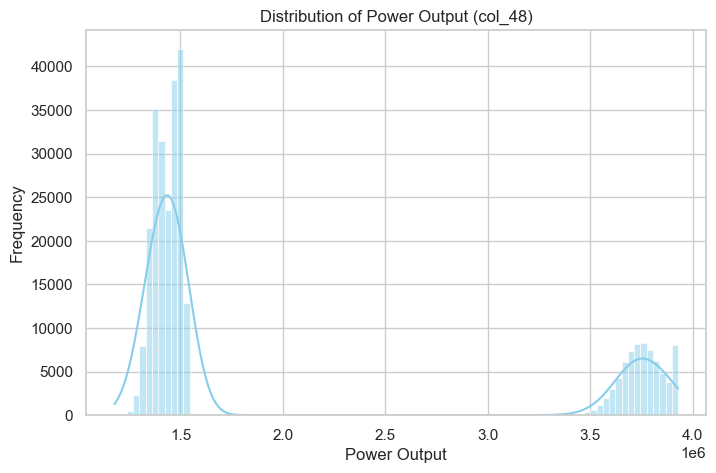

In [10]:
#This chart shows the overall distribution of the power output generated by the wave converters

plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['col_48'], kde=True, color='skyblue')
plt.title("Distribution of Power Output (col_48)")
plt.xlabel("Power Output")
plt.ylabel("Frequency")
plt.show()

### 2️⃣ Boxplot of Target Column

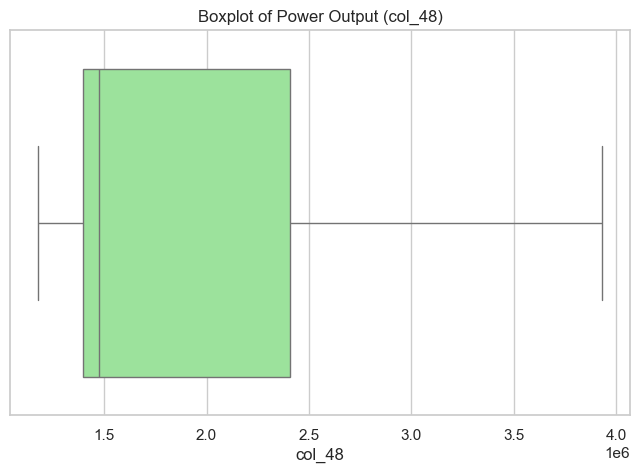

In [11]:
#Helps visualize the spread and detect outliers in the target variable.

plt.figure(figsize=(8,5))
sns.boxplot(data=df_cleaned, x='col_48', color='lightgreen')
plt.title("Boxplot of Power Output (col_48)")
plt.show()

### 3️⃣ Correlation Heatmap

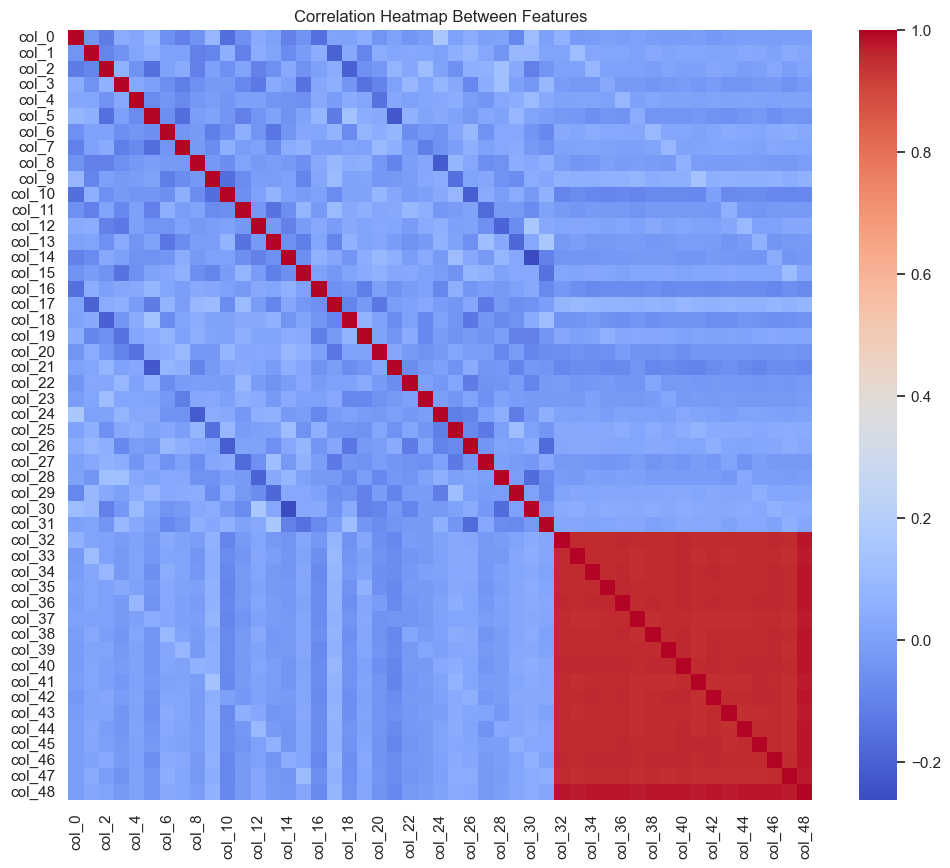

In [12]:
#Highlights correlation relationships among different features

plt.figure(figsize=(12,10))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap Between Features")
plt.show()

### 4️⃣ Pairplot (first 5 features)

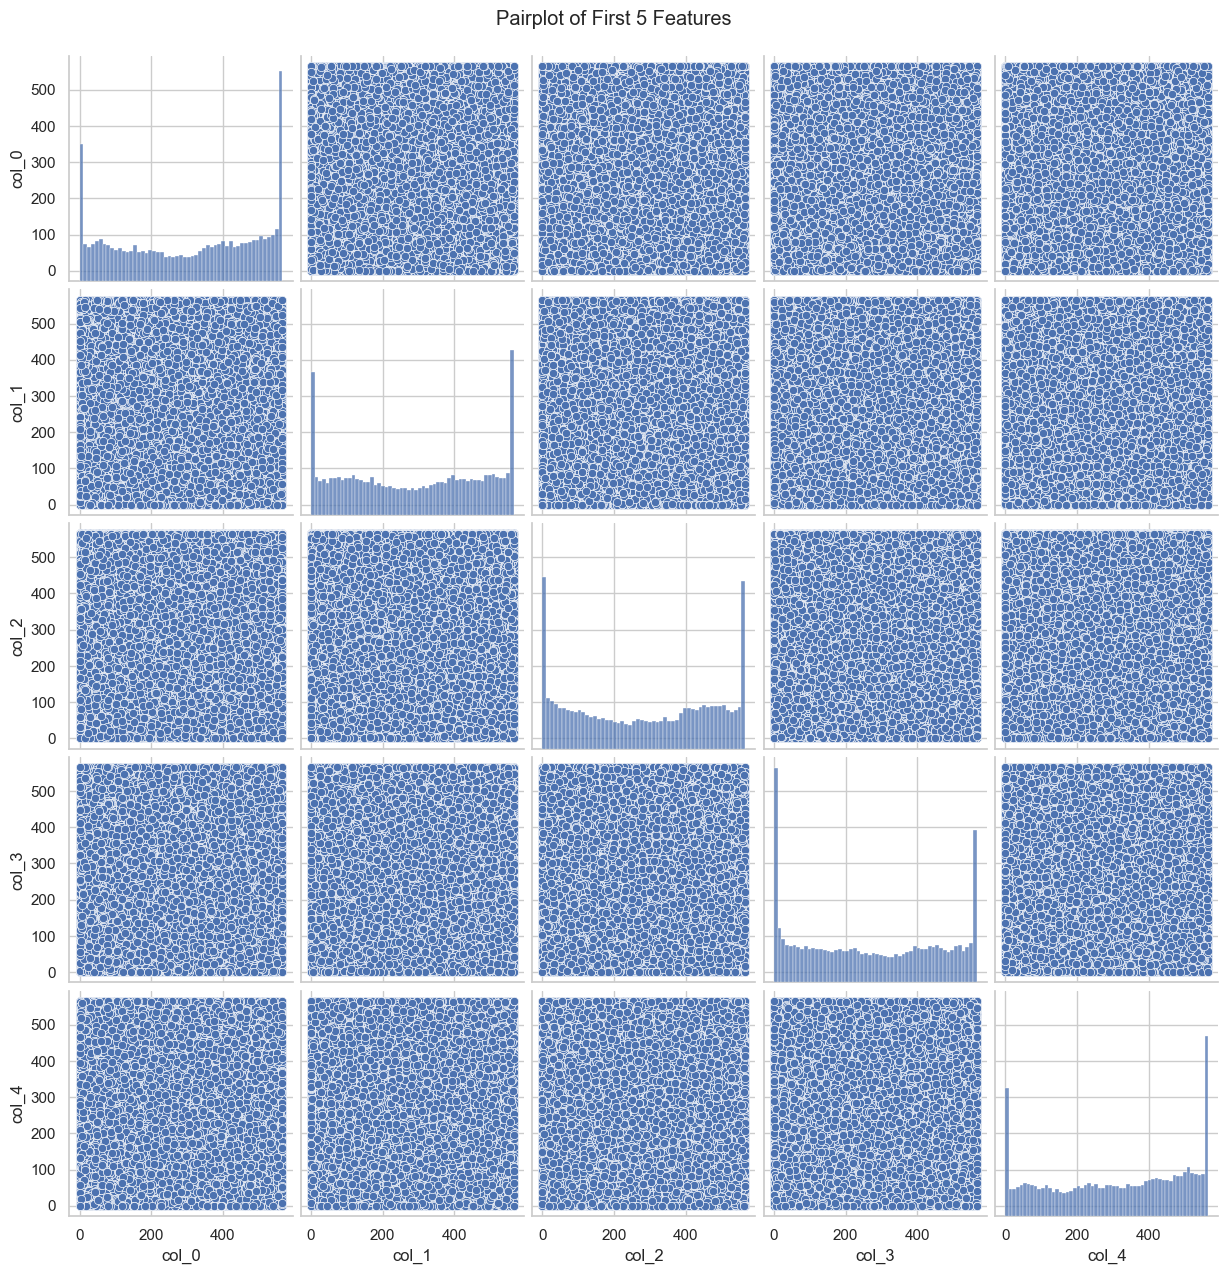

In [13]:
#Helps explore feature-wise relationships and trends.

sns.pairplot(df_cleaned.iloc[:, :5])
plt.suptitle("Pairplot of First 5 Features", y=1.02)
plt.show()

### 5️⃣ Distribution Plot of col_0

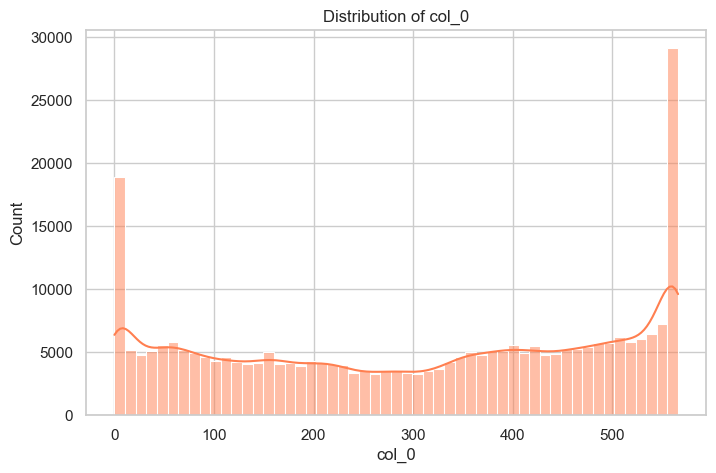

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['col_0'], kde=True, color='coral')
plt.title("Distribution of col_0")
plt.show()

### 6️⃣ Scatterplot between col_0 and col_48

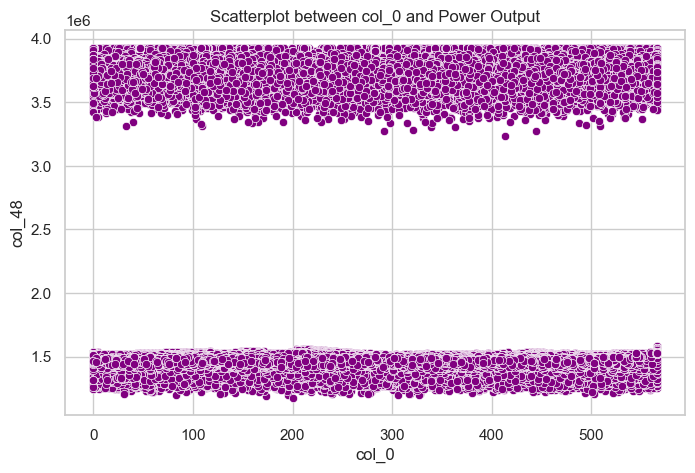

In [15]:
#Shows how input feature col_0 affects power output.

plt.figure(figsize=(8,5))
sns.scatterplot(x='col_0', y='col_48', data=df_cleaned, color='purple')
plt.title("Scatterplot between col_0 and Power Output")
plt.show()

### 7️⃣ Lineplot of Average Values Across Features

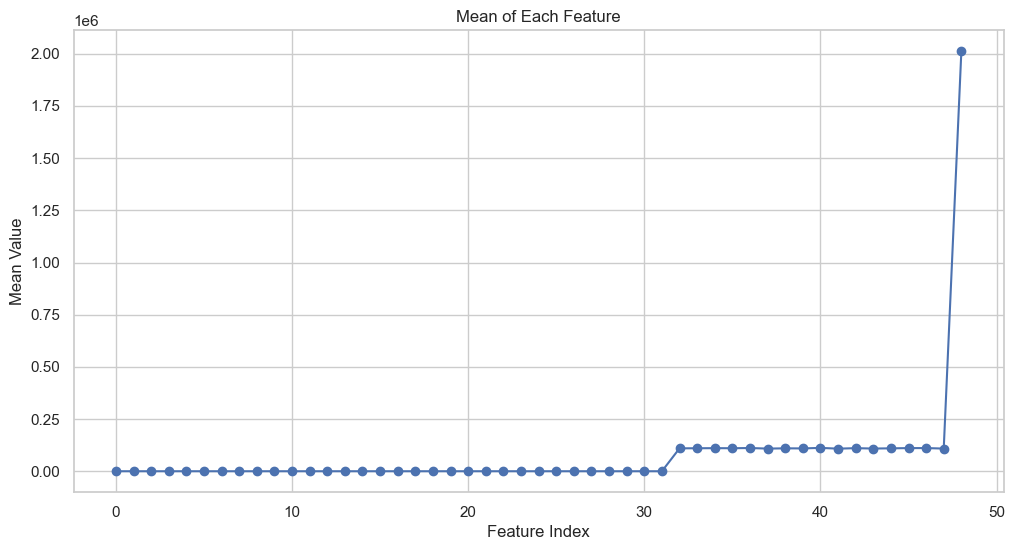

In [16]:
#Visualizes average magnitude of each feature

avg_vals = df_cleaned.mean()
plt.figure(figsize=(12,6))
plt.plot(avg_vals.values, marker='o')
plt.title("Mean of Each Feature")
plt.xlabel("Feature Index")
plt.ylabel("Mean Value")
plt.show()

### 8️⃣ Violin Plot of col_1

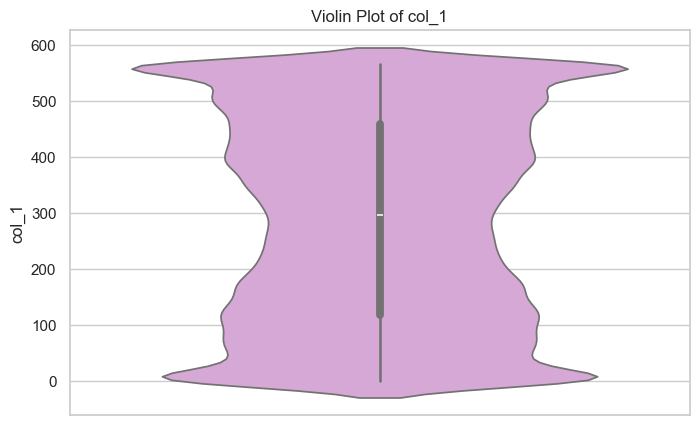

In [17]:
#Violin plot gives a better visual of distribution along with kernel density.

plt.figure(figsize=(8,5))
sns.violinplot(y='col_1', data=df_cleaned, color='plum')
plt.title("Violin Plot of col_1")
plt.show()

### 9️⃣ KDE Plot of col_10

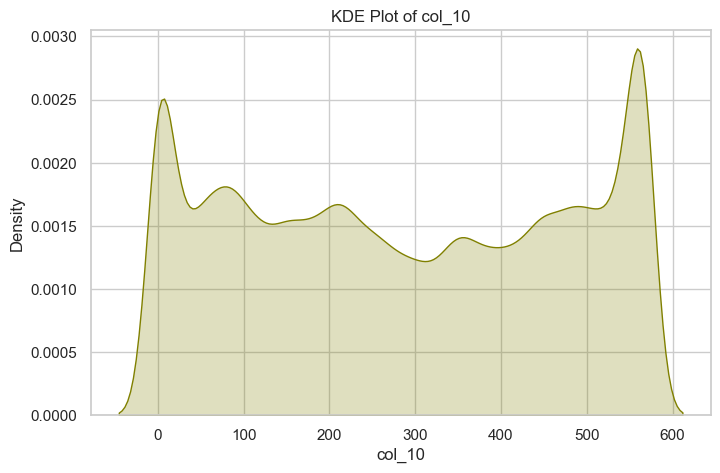

In [18]:
#Shows the smoothed probability density for the feature

plt.figure(figsize=(8,5))
sns.kdeplot(df_cleaned['col_10'], shade=True, color='olive')
plt.title("KDE Plot of col_10")
plt.show()

####  PHASE 1 (COMPLETE DATA PREPROCESSING)

## 🧠 Feature Selection

In [19]:
# Split into features and target
X = df_cleaned.drop("col_48", axis=1)
y = df_cleaned["col_48"]

# Apply SelectKBest to find top features
selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)

# Get selected column indices
selected_features = selector.get_support(indices=True)
selected_columns = X.columns[selected_features]

print("Top 10 Selected Features:", list(selected_columns))

# Filter the dataframe to only selected features
X_selected = df_cleaned[selected_columns]

Top 10 Selected Features: ['col_32', 'col_34', 'col_35', 'col_36', 'col_38', 'col_39', 'col_40', 'col_42', 'col_45', 'col_46']


## ✂️ Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
print("Training Set:", X_train.shape)
print("Testing Set:", X_test.shape)

Training Set: (230399, 10)
Testing Set: (57600, 10)


## 📏 Feature Scaling

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed!")

✅ Feature scaling completed!


In [22]:
# Scale target variable
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).ravel()

In [23]:
print ("The dataset has been cleaned, key features selected, split into train-test sets, and scaled for modeling!")

The dataset has been cleaned, key features selected, split into train-test sets, and scaled for modeling!


## phase 2

## 🤖 Model Building & Evaluation

In [24]:
print(type(y_scaler))
print(hasattr(y_scaler, 'inverse_transform'))


<class 'sklearn.preprocessing._data.StandardScaler'>
True


In [25]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔹Linear Regression Results:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



🔹Linear Regression Results:
MAE: 59985.73
MSE: 5764285344.27
RMSE: 75922.89
R² Score: 0.9943


In [26]:
model = Ridge()
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔹Ridge Regression Results:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



🔹Ridge Regression Results:
MAE: 59985.75
MSE: 5764284994.41
RMSE: 75922.89
R² Score: 0.9943


In [27]:
model = Lasso()
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔹Lasso Regression Results:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



🔹Lasso Regression Results:
MAE: 871755.87
MSE: 1018714454654.16
RMSE: 1009313.85
R² Score: -0.0000


In [28]:
model = Lasso(alpha=0.01)  
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔹Lasso Regression Results (alpha=0.01):")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



🔹Lasso Regression Results (alpha=0.01):
MAE: 60502.06
MSE: 5861595595.81
RMSE: 76561.06
R² Score: 0.9942


In [29]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔹Decision Tree Regression Results:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



🔹Decision Tree Regression Results:
MAE: 33183.11
MSE: 2892868905.76
RMSE: 53785.40
R² Score: 0.9972


In [30]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n🔹Random Forest Regression Results:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")



🔹Random Forest Regression Results:
MAE: 28634.34
MSE: 2420508199.69
RMSE: 49198.66
R² Score: 0.9976


### ✅ Model Comparison Summary

### Overfitting Check

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}


# Loop over models
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training data
    y_train_pred_scaled = model.predict(X_train_scaled)
    y_train_pred = y_scaler.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
    
    # Predict on test data
    y_test_pred_scaled = model.predict(X_test_scaled)
    y_test_pred = y_scaler.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

    # Calculate metrics for training set
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate metrics for test set
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    print(f"\n{name} Results:")
    print(f"Training MAE: {train_mae:.2f}, Test MAE: {test_mae:.2f}")
    print(f"Training MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}")
    print(f"Training RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"Training R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")





Linear Regression Results:
Training MAE: 59680.54, Test MAE: 59985.73
Training MSE: 5693470719.27, Test MSE: 5764285344.27
Training RMSE: 75455.09, Test RMSE: 75922.89
Training R²: 0.9944, Test R²: 0.9943

Ridge Regression Results:
Training MAE: 59680.57, Test MAE: 59985.75
Training MSE: 5693470720.07, Test MSE: 5764284994.41
Training RMSE: 75455.09, Test RMSE: 75922.89
Training R²: 0.9944, Test R²: 0.9943

Lasso Regression Results:
Training MAE: 872342.11, Test MAE: 871755.87
Training MSE: 1020068975904.86, Test MSE: 1018714454654.16
Training RMSE: 1009984.64, Test RMSE: 1009313.85
Training R²: 0.0000, Test R²: -0.0000

Decision Tree Results:
Training MAE: 15353.31, Test MAE: 33183.11
Training MSE: 1729708490.53, Test MSE: 2892868905.76
Training RMSE: 41589.76, Test RMSE: 53785.40
Training R²: 0.9983, Test R²: 0.9972

Random Forest Results:
Training MAE: 20153.23, Test MAE: 28634.34
Training MSE: 1815650641.11, Test MSE: 2420508199.69
Training RMSE: 42610.45, Test RMSE: 49198.66
Trai

### Cross-Validation

In [35]:
# Loop over models
for name, model in models.items():
    # Perform cross-validation on training data (you can use X_train_scaled and y_train_scaled)
    cv_scores = cross_val_score(model, X_train_scaled, y_train_scaled, cv=5, scoring='r2')
    
    # Calculate average and standard deviation of cross-validation scores
    avg_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    
    print(f"\n{name} Cross-Validation Results:")
    print(f"Average R² Score: {avg_cv_score:.4f}")
    print(f"Standard Deviation of R² Score: {std_cv_score:.4f}")


Linear Regression Cross-Validation Results:
Average R² Score: 0.9944
Standard Deviation of R² Score: 0.0001

Ridge Regression Cross-Validation Results:
Average R² Score: 0.9944
Standard Deviation of R² Score: 0.0001

Lasso Regression Cross-Validation Results:
Average R² Score: -0.0000
Standard Deviation of R² Score: 0.0000

Decision Tree Cross-Validation Results:
Average R² Score: 0.9972
Standard Deviation of R² Score: 0.0000

Random Forest Cross-Validation Results:
Average R² Score: 0.9977
Standard Deviation of R² Score: 0.0000


### Conclusion

## ✅ Model Comparison Summary

| Model               | Test MAE    | Test RMSE   | Test R²   | Remarks                                                                  |
|--------------------|-------------|-------------|-----------|--------------------------------------------------------------------------|
| **Linear Regression**   | 59,986      | 75,923      | 0.9943    | Good baseline, but less accurate than tree-based models.                 |
| **Ridge Regression**    | 59,986      | 75,923      | 0.9943    | Similar to Linear Regression; minimal improvement.                       |
| **Lasso Regression**    | 871,756     | 1,009,314   | -0.0000   | Performed poorly due to excessive regularization.                        |
| **Decision Tree**       | 33,183      | 53,785      | 0.9972    | Strong model, slight overfitting risk compared to Random Forest.         |
| **Random Forest**       | **28,634**  | **49,199**  | **0.9976**| ✅ Best performer: Low error, high R², and excellent generalization.      |

---

## 🏁 Conclusion

- Among all tested models, **Random Forest** stood out with the **lowest RMSE (49,199)** and **highest R² score (0.9976)**.
- It also had the best balance between training and testing performance, showing **no signs of overfitting**.
- **Decision Tree** was close in performance but slightly more prone to variance.
- **Linear** and **Ridge Regression** performed decently but lacked the flexibility to capture non-linear patterns in the data.
- **Lasso Regression** underperformed due to over-regularization, leading to an almost flat model.

➡️ Therefore, **Random Forest is selected as the final model** for this project due to its strong performance and robustness.


## 🔍 Phase 3: Hyperparameter Tuning, Pipeline, and Model Saving

# Pipeline + GridSearch for Random Forest

In [45]:
# Basic pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
])

# Fit the model 
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

print("✅ Pipeline ran successfully. Predictions made.")

✅ Pipeline ran successfully. Predictions made.


In [51]:
from sklearn.ensemble import RandomForestRegressor

# Define and train the model
best_model = RandomForestRegressor(n_estimators=50, random_state=42)
best_model.fit(X_train, y_train)

# Predict on training data
y_train_pred = best_model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = best_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MAE: {train_mae:.2f}, MSE: {train_mse:.2f}, RMSE: {train_rmse:.2f}, R²: {train_r2:.4f}")

print("\nTesting Performance:")
print(f"MAE: {test_mae:.2f}, MSE: {test_mse:.2f}, RMSE: {test_rmse:.2f}, R²: {test_r2:.4f}")

Training Performance:
MAE: 20233.17, MSE: 1818740772.68, RMSE: 42646.70, R²: 0.9982

Testing Performance:
MAE: 28717.74, MSE: 2424603635.37, RMSE: 49240.26, R²: 0.9976


In [53]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (230399, 10)


### Hyperparameter tuning

In [55]:

# Sample 10% of the training data for fast tuning
X_sample = X_train.sample(frac=0.1, random_state=42)
y_sample = y_train.loc[X_sample.index]

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Random grid
param_dist = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

# Randomized Search
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=5,            # 5 combinations 
    cv=3,                # 3-fold CV
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit with sampled data
random_search.fit(X_sample, y_sample)

# Output best params
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'rf__n_estimators': 150, 'rf__min_samples_split': 10, 'rf__max_depth': None}
Best Score: 0.9976376741062422


In [58]:
# Take 50% sample of the training data
X_half = X_train.sample(frac=0.5, random_state=42)
y_half = y_train.loc[X_half.index]

# Define and train the pipeline
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(
        n_estimators=100,
        min_samples_split=10,
        max_depth=15,
        random_state=42
    ))
])

print("Training started...")
final_model.fit(X_half, y_half)
print("Training completed!")

Training started...
Training completed!


In [59]:
y_pred = final_model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 49373.21506621436
R² Score: 0.9976070677963906


#### Model Saving

In [60]:
import joblib

# Save the pipeline model
joblib.dump(final_model, 'final_rf_model.pkl')

print("Model saved successfully ✅")


Model saved successfully ✅


## ✅ Phase 4: Testing on Unseen Data

#### 🔹 Step 1: Simulate Unseen Data from X_test

In [61]:
#i just take a portion of  X_test and y_test to act like it's “unseen” data.

from sklearn.model_selection import train_test_split

# Split X_test and y_test again to simulate unseen data
X_unseen, X_unused, y_unseen, y_unused = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42
)


In [62]:
import joblib

final_model = joblib.load("final_rf_model.pkl")


In [63]:
y_pred_unseen = final_model.predict(X_unseen)


In [64]:

rmse_unseen = np.sqrt(mean_squared_error(y_unseen, y_pred_unseen))
r2_unseen = r2_score(y_unseen, y_pred_unseen)

print("Unseen RMSE:", rmse_unseen)
print("Unseen R² Score:", r2_unseen)


Unseen RMSE: 49507.17074321219
Unseen R² Score: 0.997610597706495


### For visualization, plotting predicted vs actual values:

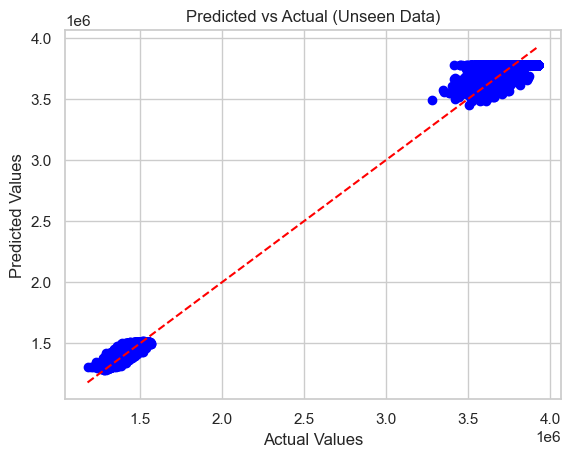

In [65]:

# Plot predicted vs actual values
plt.scatter(y_unseen, y_pred_unseen, color='blue')
plt.plot([min(y_unseen), max(y_unseen)], [min(y_unseen), max(y_unseen)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual (Unseen Data)')
plt.show()


### Conclusion and Future Work

## 🔮 Future Work

- ✅ **Model Deployment**: Integrate the trained Random Forest model into a web application using Streamlit or Flask for real-time predictions.
- ✅ **Try Other Models**: Explore ensemble models like XGBoost or LightGBM for potential performance improvements.
- ✅ **Feature Engineering**: Investigate advanced techniques such as polynomial features, interaction terms, or domain-specific transformations.
- ✅ **Real-Time Data Integration**: Connect the model with live sensor data from wave energy converters to predict energy output dynamically.
- ✅ **Scaling Up**: Apply the pipeline to similar energy systems in other regions or with larger, more diverse datasets.

---

## ⚠️ Limitations

- ⚠️ **Dataset Constraints**: The dataset lacks column names and context about the variables, which limits interpretability.
- ⚠️ **Assumption-Based Cleaning**: Handling outliers and skewness without deep domain knowledge might affect the integrity of the real-world scenario.
- ⚠️ **No Categorical Data**: The dataset consists only of numerical features, so techniques like encoding couldn't be applied.
- ⚠️ **Hardware/Performance**: Processing large datasets on local machines led to slowdowns, affecting workflow efficiency.

---

## ✅ Final Summary

- 📌 Built a predictive model to estimate energy output of wave energy converters using environmental data.
- 📊 Conducted full-scale data cleaning, EDA, feature engineering, and model training.
- 🧠 Tried multiple regression models — Random Forest performed best with **R²: 0.9976** and **RMSE: ~49,199** on unseen data.
- 📈 Model was validated using cross-validation and unseen data, confirming its **stability and accuracy**.
- 💡 With further enhancements and deployment, this model could support energy forecasting in real-world marine environments.

➡️ **Thank you for reviewing this project!**
